In [3]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
SIZE=256
img_data=[]

img=cv2.imread('/content/drive/MyDrive/Images/monalisa.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.


In [7]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

Streaming output truncated to the last 5000 lines.
Epoch 7502/10000
1/1 [==============================] - 0s 292ms/step - loss: 0.0011 - accuracy: 0.9017
Epoch 7503/10000
1/1 [==============================] - 0s 277ms/step - loss: 0.0011 - accuracy: 0.8970
Epoch 7504/10000
1/1 [==============================] - 0s 286ms/step - loss: 0.0010 - accuracy: 0.9012
Epoch 7505/10000
1/1 [==============================] - 0s 280ms/step - loss: 0.0010 - accuracy: 0.9004
Epoch 7506/10000
1/1 [==============================] - 0s 274ms/step - loss: 9.9620e-04 - accuracy: 0.9026
Epoch 7507/10000
1/1 [==============================] - 0s 271ms/step - loss: 9.9811e-04 - accuracy: 0.9035
Epoch 7508/10000
1/1 [==============================] - 0s 269ms/step - loss: 0.0010 - accuracy: 0.9004
Epoch 7509/10000
1/1 [==============================] - 0s 280ms/step - loss: 0.0010 - accuracy: 0.9030
Epoch 7510/10000
1/1 [==============================] - 0s 279ms/step - loss: 0.0010 - accuracy: 0.8997
Epoch

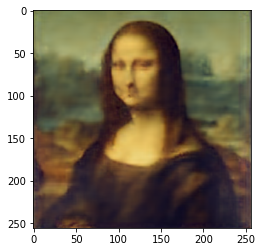

In [ ]:
model.fit(img_array, img_array,
        epochs=10000,
        shuffle=True)


print("Neural network output")
pred = model.predict(img_array)



imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")